So firstly let's discuss what is Stroke?
*Stroke is a medical condition in which there is a disruption in the blood supply to the brain. It could Either be ischemic, Transient Ischemic or haemorrhagic. **Ischemic stroke** implies to the type where either thrombus (blood clot) forms and impeded the blood flow or an embolus (distant blood clot which detaches from it's place of origin and travels elsewhere) gets stuck in any artery in the brain. A **Transient ischemic attack (TIA)** is a stroke that lasts only a few minutes. It happens when the blood supply to part of the brain is briefly blocked. Symptoms of a TIA are like other stroke symptoms, but do not last as long. They happen suddenly, and include: Numbness or weakness, especially on one side of the body. Where as **Haemorrhagic stroke** implies to the type where blood vessel ruptures in the brain. Both ischemic and haemorraghic types are dangerous but haemorrhagic stroke proves fatal mostly*
so enough of the medical thing, let's jump into the data analysis and model prediction.


Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

let's import the libraries first. NumPy for mathematical functions, linear algebra and working with arrays.
Pandas for data manipulation and analysis. Matplotlib and Seaborn for data visulaisation

In [13]:
dataframe=pd.read_csv('data/healthcare-dataset-stroke-data.csv')
dataframe=dataframe.drop('id', axis=1)

In [14]:
dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


we have loaded the file and opened the data. there are a total of 5110 rows and 11 columns. 
ID column wasn't an essential one for data analysis and prediction so dropped it using pandas .drop function.

'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke' are Numerical columns where Stroke will be the dependant/target attribute and used for predictive analysis.

Rest of the columns are numerical

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


the data comprises of 3 float, 3 integer and 5 object types.Out of all BMI seems to have some null values.

In [16]:
dataframe.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The numerical data is distrubuted in the above ways. STD is noticable in the sections of age anf avg glucose

In [17]:
dataframe.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
dataframe.skew()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_20548\194550592.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.skew()


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [19]:
dataframe.bmi.fillna(dataframe.bmi.mean(), inplace=True)
dataframe.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

so i have took the mean of all the values of bmi section and imputed the missing data in this way. now we don't have to worry at all about the missing data

In [20]:
dataframe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:>

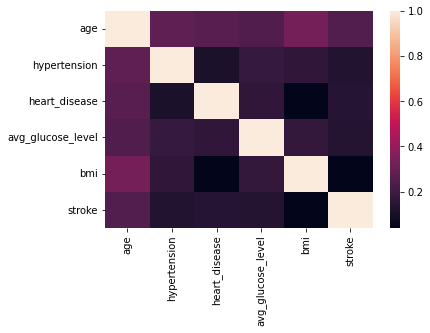

In [21]:
corr=dataframe.corr()
sns.heatmap(corr)

None of the values seem to be interlinked to me.

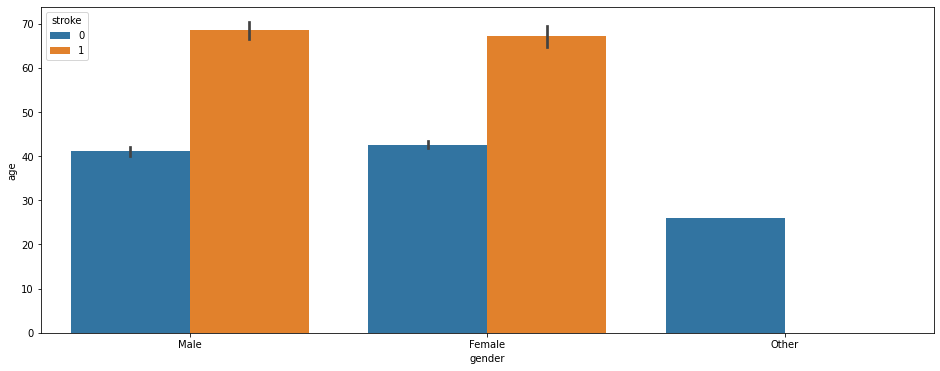

In [22]:
plt.figure(figsize=(16,6));
sns.barplot(
    data=dataframe, x="gender", y="age", hue="stroke");

<AxesSubplot:xlabel='stroke', ylabel='Count'>

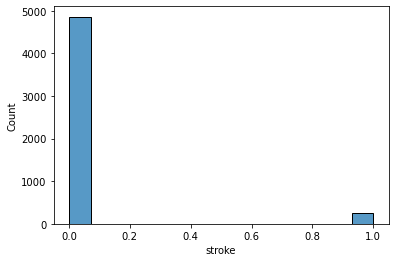

In [23]:

sns.histplot(dataframe.stroke)

out of all the surveyors, only 200-300 have had the history of stroke, rest of the people have negetive history

In [24]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
# # bar chart and histogram
# for column in dataframe:
#     plt.figure(column, figsize = (4.9,4.9))
#     plt.title(column)
#     if is_numeric_dtype(dataframe[column]):
#         dataframe[column].plot(kind = 'hist')
#     elif is_string_dtype(dataframe[column]):
#  # show only the TOP 10 value count in each categorical data
#         dataframe[column].value_counts()[:10].plot(kind = 'bar')

seems like more females have took the survey than males. age group of 50-60 year is more common amony the surveyous. Most of the surveyors are married, and indulged in Private job plus most of them have no cardiac, diabetic or hypertensive history.

In [25]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in dataframe:
    if is_numeric_dtype(dataframe[column]):
        num_list.append(column)
    elif is_string_dtype(dataframe[column]):
        cat_list.append(column)    

print('Numerical columns', num_list)
print('Categorical columns', cat_list)

Numerical columns ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical columns ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


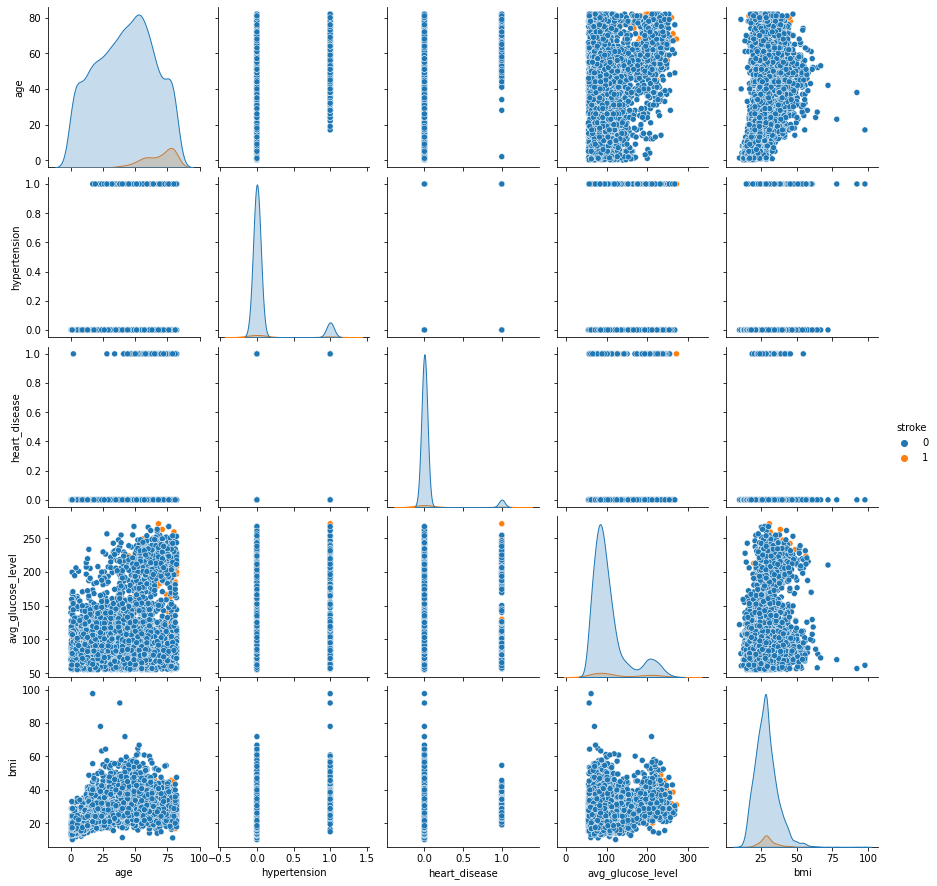

In [26]:
sns.pairplot(dataframe,height = 2.5, hue='stroke')

Most the patients who had stroke were of 60-80 years having positive history of diabetes and high BMI

In [27]:
df=dataframe

In [28]:
# # grouped bar chart
# for i in range(0, len(cat_list)):
#     primary_cat = cat_list[i]
#     for j in range(0, len(cat_list)):
#         secondary_cat = cat_list[j]
#         if secondary_cat != primary_cat:
#             plt.figure (figsize = (5,5))
#             chart = sns.countplot(
#                 data = df,
#                 x= primary_cat, 
#                 hue= secondary_cat,
#                 palette = 'GnBu',
#                 order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
#               )

In [29]:
# for i in range(0, len(cat_list)):
#     cat = cat_list[i]
#     for j in range(0, len(num_list)):
#         num = num_list[j]
#         plt.figure (figsize = (5,5))
#         sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")

In [30]:
df_dummy = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df_dummy

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [31]:
X = df_dummy.drop(['stroke'], axis=1)
y= df_dummy['stroke']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [34]:
model = RandomForestClassifier(random_state = 40)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [27]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
pipeline_kernelsvm=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('k_svm_classifier',SVC(kernel = 'rbf', random_state = 0))])

pipeline_knn=Pipeline([('scalar5',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])


In [28]:

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_kernelsvm, pipeline_knn]

In [29]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3:'Kernel SVM', 4:'KNN'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [30]:

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.9412915851272016
Decision Tree Test Accuracy: 0.9099804305283757
RandomForest Test Accuracy: 0.9422700587084148
Kernel SVM Test Accuracy: 0.9412915851272016
KNN Test Accuracy: 0.9393346379647749


In [31]:
best_accuracy=0.00
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [36]:
rf_clf=RandomForestClassifier()

In [37]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rf_clf.score(X_train,y_train)

1.0

In [39]:
rf_clf.score(X_test,y_test)

0.9403131115459883

In [43]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4152,55.0,0,0,73.57,28.0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4051,55.0,0,0,231.15,22.3,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5076,34.0,0,0,174.37,23.0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
874,80.0,0,0,56.99,26.7,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3534,61.0,0,0,108.18,19.1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,46.0,0,0,137.77,29.3,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2763,45.0,0,0,63.73,32.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
905,31.0,0,0,76.26,35.6,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3980,45.0,0,0,218.10,55.0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [42]:
rf_clf.predict("Male",67,0,1,"Yes","Private","Urban",228.69,36.6,"formerly smoked")

TypeError: ForestClassifier.predict() takes 2 positional arguments but 11 were given